In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [2]:
with open('data.txt', 'r') as f:
    res = f.read()

records = [list(map(str.strip, line.strip().split())) for line in res.split('\n')]

In [4]:
l = []
for record in records:
    d = {}
    d['label'] = record[0]
    for r in record[1:]:
        key = r[0]
        value = r[2:]
        d[key] = value
    l.append(d)

In [5]:
df = pd.DataFrame(l).fillna(0)
print(df)

    label           1           2           3          4          5  \
0      -1   -0.294118    0.487437    0.180328  -0.292929         -1   
1      +1   -0.882353   -0.145729   0.0819672  -0.414141         -1   
2      -1  -0.0588235    0.839196   0.0491803         -1         -1   
3      +1   -0.882353   -0.105528   0.0819672  -0.535354  -0.777778   
4      -1          -1    0.376884   -0.344262  -0.292929  -0.602837   
..    ...         ...         ...         ...        ...        ...   
763    +1    0.176471   0.0150754    0.245902  -0.030303  -0.574468   
764    +1   -0.764706    0.226131    0.147541  -0.454545         -1   
765    +1   -0.411765     0.21608    0.180328  -0.535354  -0.735225   
766    -1   -0.882353    0.266332  -0.0163934         -1         -1   
767    +1   -0.882353  -0.0653266    0.147541  -0.373737         -1   

              6          7           8  
0    0.00149028   -0.53117  -0.0333333  
1     -0.207153  -0.766866   -0.666667  
2     -0.305514  -0.4927

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_set, val_set = train_test_split(train_set, test_size=0.2, random_state=42, stratify=train_set['label'])
X_train = train_set.iloc[:,1:]
y_train = train_set.iloc[:,0]
X_test = test_set.iloc[:,1:]
y_test = test_set.iloc[:,0]
X_val = val_set.iloc[:,1:]
y_val = val_set.iloc[:,0]
print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(491, 8), (491,), (154, 8), (154,), (123, 8), (123,)]


In [10]:
X_train.reset_index(drop =True, inplace =True)
y_train.reset_index(drop =True, inplace =True)
X_test.reset_index(drop =True, inplace =True)
y_test.reset_index(drop =True, inplace =True)
X_val.reset_index(drop =True, inplace =True)
y_val.reset_index(drop =True, inplace =True)

In [126]:
lr=0.001
epoch=50
w=np.zeros(8)
for i in range(epoch):
    sum_arr=np.zeros(8)
    for j in range(len(X_train)):
        x=[X_train['1'][j],X_train['2'][j],X_train['3'][j],X_train['4'][j],X_train['5'][j],X_train['6'][j],X_train['7'][j],X_train['8'][j]]
        x=np.asarray(x, dtype=np.float32)
        y=y_train[j]
        param=0
        if np.dot(w,x)<0 and y=='+1':
            param=1
        elif np.dot(w,x)>=0 and y=='-1':
            param=1
        mult_arr=x*int(y)*param
        sum_arr=sum_arr+mult_arr
    w=w+lr*sum_arr
print(w)

[-0.08664713 -0.26967345  0.05391802 -0.04354555  0.01371376 -0.23433832
 -0.10276689 -0.05686669]


In [98]:
train_acc=[]

In [115]:
train_predict=[]
for i in range(len(X_train)):
    x=[X_train['1'][i],X_train['2'][i],X_train['3'][i],X_train['4'][i],X_train['5'][i],X_train['6'][i],X_train['7'][i],X_train['8'][i]]
    x=np.asarray(x, dtype=np.float32)
    if np.dot(w,x)<0:
        train_predict.append('-1')
    else:
        train_predict.append('+1')
train_predict=pd.Series(train_predict)
correct=0
for i in range(len(train_predict)):
    if train_predict[i]==y_train[i]:
        correct=correct+1
accuracy=correct/len(train_predict)
train_acc.append(accuracy)

In [116]:
print(train_acc)

[0.7637474541751528, 0.7637474541751528, 0.7637474541751528, 0.7637474541751528]


In [101]:
val_acc=[]

In [117]:
val_predict=[]
for i in range(len(X_val)):
    x=[X_val['1'][i],X_val['2'][i],X_val['3'][i],X_val['4'][i],X_val['5'][i],X_val['6'][i],X_val['7'][i],X_val['8'][i]]
    x=np.asarray(x, dtype=np.float32)
    if np.dot(w,x)<0:
        val_predict.append('-1')
    else:
        val_predict.append('+1')
val_predict=pd.Series(val_predict)
correct=0
for i in range(len(val_predict)):
    if val_predict[i]==y_val[i]:
        correct=correct+1
accuracy=correct/len(val_predict)
val_acc.append(accuracy)

In [118]:
print(val_acc)

[0.7804878048780488, 0.7804878048780488, 0.7804878048780488, 0.7804878048780488]


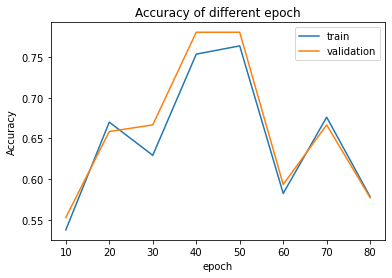

In [96]:
import matplotlib.pyplot as plt
   
epoch=[10,20,30,40,50,60,70,80]
  
plt.plot(epoch, train_acc,label='train')
plt.plot(epoch, val_acc,label='validation')
plt.title('Accuracy of different epoch')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

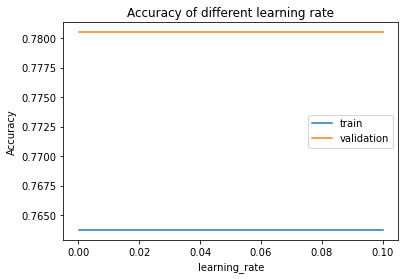

In [120]:
import matplotlib.pyplot as plt
   
learning_rate=[0.1,0.01,0.001,0.0001]
  
plt.plot(learning_rate, train_acc,label='train')
plt.plot(learning_rate, val_acc,label='validation')
plt.title('Accuracy of different learning rate')
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [127]:
y_predict=[]
for i in range(len(X_test)):
    x=[X_test['1'][i],X_test['2'][i],X_test['3'][i],X_test['4'][i],X_test['5'][i],X_test['6'][i],X_test['7'][i],X_test['8'][i]]
    x=np.asarray(x, dtype=np.float32)
    if np.dot(w,x)<0:
        y_predict.append('-1')
    else:
        y_predict.append('+1')
y_predict=pd.Series(y_predict)

In [128]:
correct=0
for i in range(len(y_predict)):
    if y_predict[i]==y_test[i]:
        correct=correct+1
accuracy=correct/len(y_predict)
print(accuracy)

0.7272727272727273


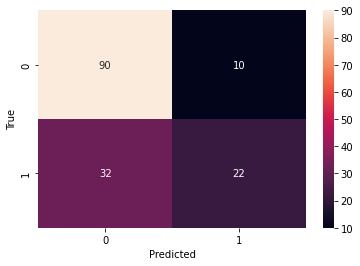

In [132]:
cmat=confusion_matrix(y_test,y_predict)
sns.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [134]:
precision = 90/(90+10)
print(precision)

0.9


In [135]:
recall=90/(90+32)
print(recall)

0.7377049180327869


In [136]:
F1_score=(2*precision*recall)/(precision+recall)
print(F1_score)

0.8108108108108109
